In [1]:
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset of all shifted wobble
sw_df = pd.read_excel('Supplementary_file.xlsx', sheet_name='Table S1')

#filtering out the redundant ones (non-representative ones)
sw_df1= sw_df[sw_df['representative']==1]
sw_df1.index= np.arange(0, len(sw_df1))

In [6]:
print (list(sw_df1.columns))

['PDB_ID', 'Experimental_Method', 'Resolution (Å)', 'chain_ID', 'seg_ID', 'Source_Organism_chain', 'Molecule', 'Source_Organism_all', 'Expressed_Organism', 'Chain_length_reference', 'Chain_length_structure', 'res_index_res1', 'bp_notation', 'res_ID_res1', 'res_index_res2', 'res_ID_res2', 'bp_res', 'bp_ID', 'b_resG', 'b_resU', 'b_comb', 'O6_O4_dih', 'N1_O2_dis', 'N1_N3_dis', 'N1_O4_dis', 'N2_O2_dis', 'N2_N3_dis', 'N2_O4_dis', 'O6_O2_dis', 'O6_N3_dis', 'O6_O4_dis', 'N1_O4_dih', 'N2_N3_dih', 'flank1', 'flank2', 'adj_res1', 'adj_res2', 'red_group_ID', 'number_of_group_members', 'missing_res_atoms', 'RMSD_to_avg', 'representative', 'G_N1_detail', 'G_N2_detail', 'G_N3_detail', 'G_O6_detail', 'G_N7_detail', "G_O2'_detail", "G_O4'_detail", 'U_O2_detail', 'U_N3_detail', 'U_O4_detail', "U_O2'_detail", "U_O4'_detail", 'G_N1_type', 'G_N2_type', 'G_N3_type', 'G_O6_type', 'G_N7_type', "G_O2'_type", "G_O4'_type", 'U_O2_type', 'U_N3_type', 'U_O4_type', "U_O2'_type", "U_O4'_type", 'combined_type', 'bp_

In [7]:
cc_df_mean= sw_df1[['Normalized_map_model_cc_for_the_G', 'Raw_map_model_cc_for_the_G', 'Mean_map_model_cc', 'Raw_map_model_cc_for_the_U', 'Normalized_map_model_cc_for_the_U']].copy()

sw_df1['Normalized_map_model_cc_for_the_G_median'] = sw_df1['Raw_map_model_cc_for_the_G'] / sw_df1['Median_map_model_cc']
sw_df1['Normalized_map_model_cc_for_the_U_median'] = sw_df1['Raw_map_model_cc_for_the_U'] / sw_df1['Median_map_model_cc']

cc_df_median= sw_df1[['Normalized_map_model_cc_for_the_G_median', 'Raw_map_model_cc_for_the_G', 'Median_map_model_cc', 'Raw_map_model_cc_for_the_U', 'Normalized_map_model_cc_for_the_U_median']].copy()

#cc_df_mean.reset_index(drop=True, inplace=False)

/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_32302/2550466929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_df1['Normalized_map_model_cc_for_the_G_median'] = sw_df1['Raw_map_model_cc_for_the_G'] / sw_df1['Median_map_model_cc']
/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_32302/2550466929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_df1['Normalized_map_model_cc_for_the_U_median'] = sw_df1['Raw_map_model_cc_for_the_U'] / sw_df1['Median_map_model_cc']


In [4]:
#emt_cls=[]

#for i in range(1, 10):
#    x1= np.repeat(' ', i)
#    x2= ''.join(x1)
#    emt_cls.append(x2)

#print (len(emt_cls))
#print ((emt_cls))
#emt_df = pd.DataFrame(columns= emt_cls)
#print (emt_df)

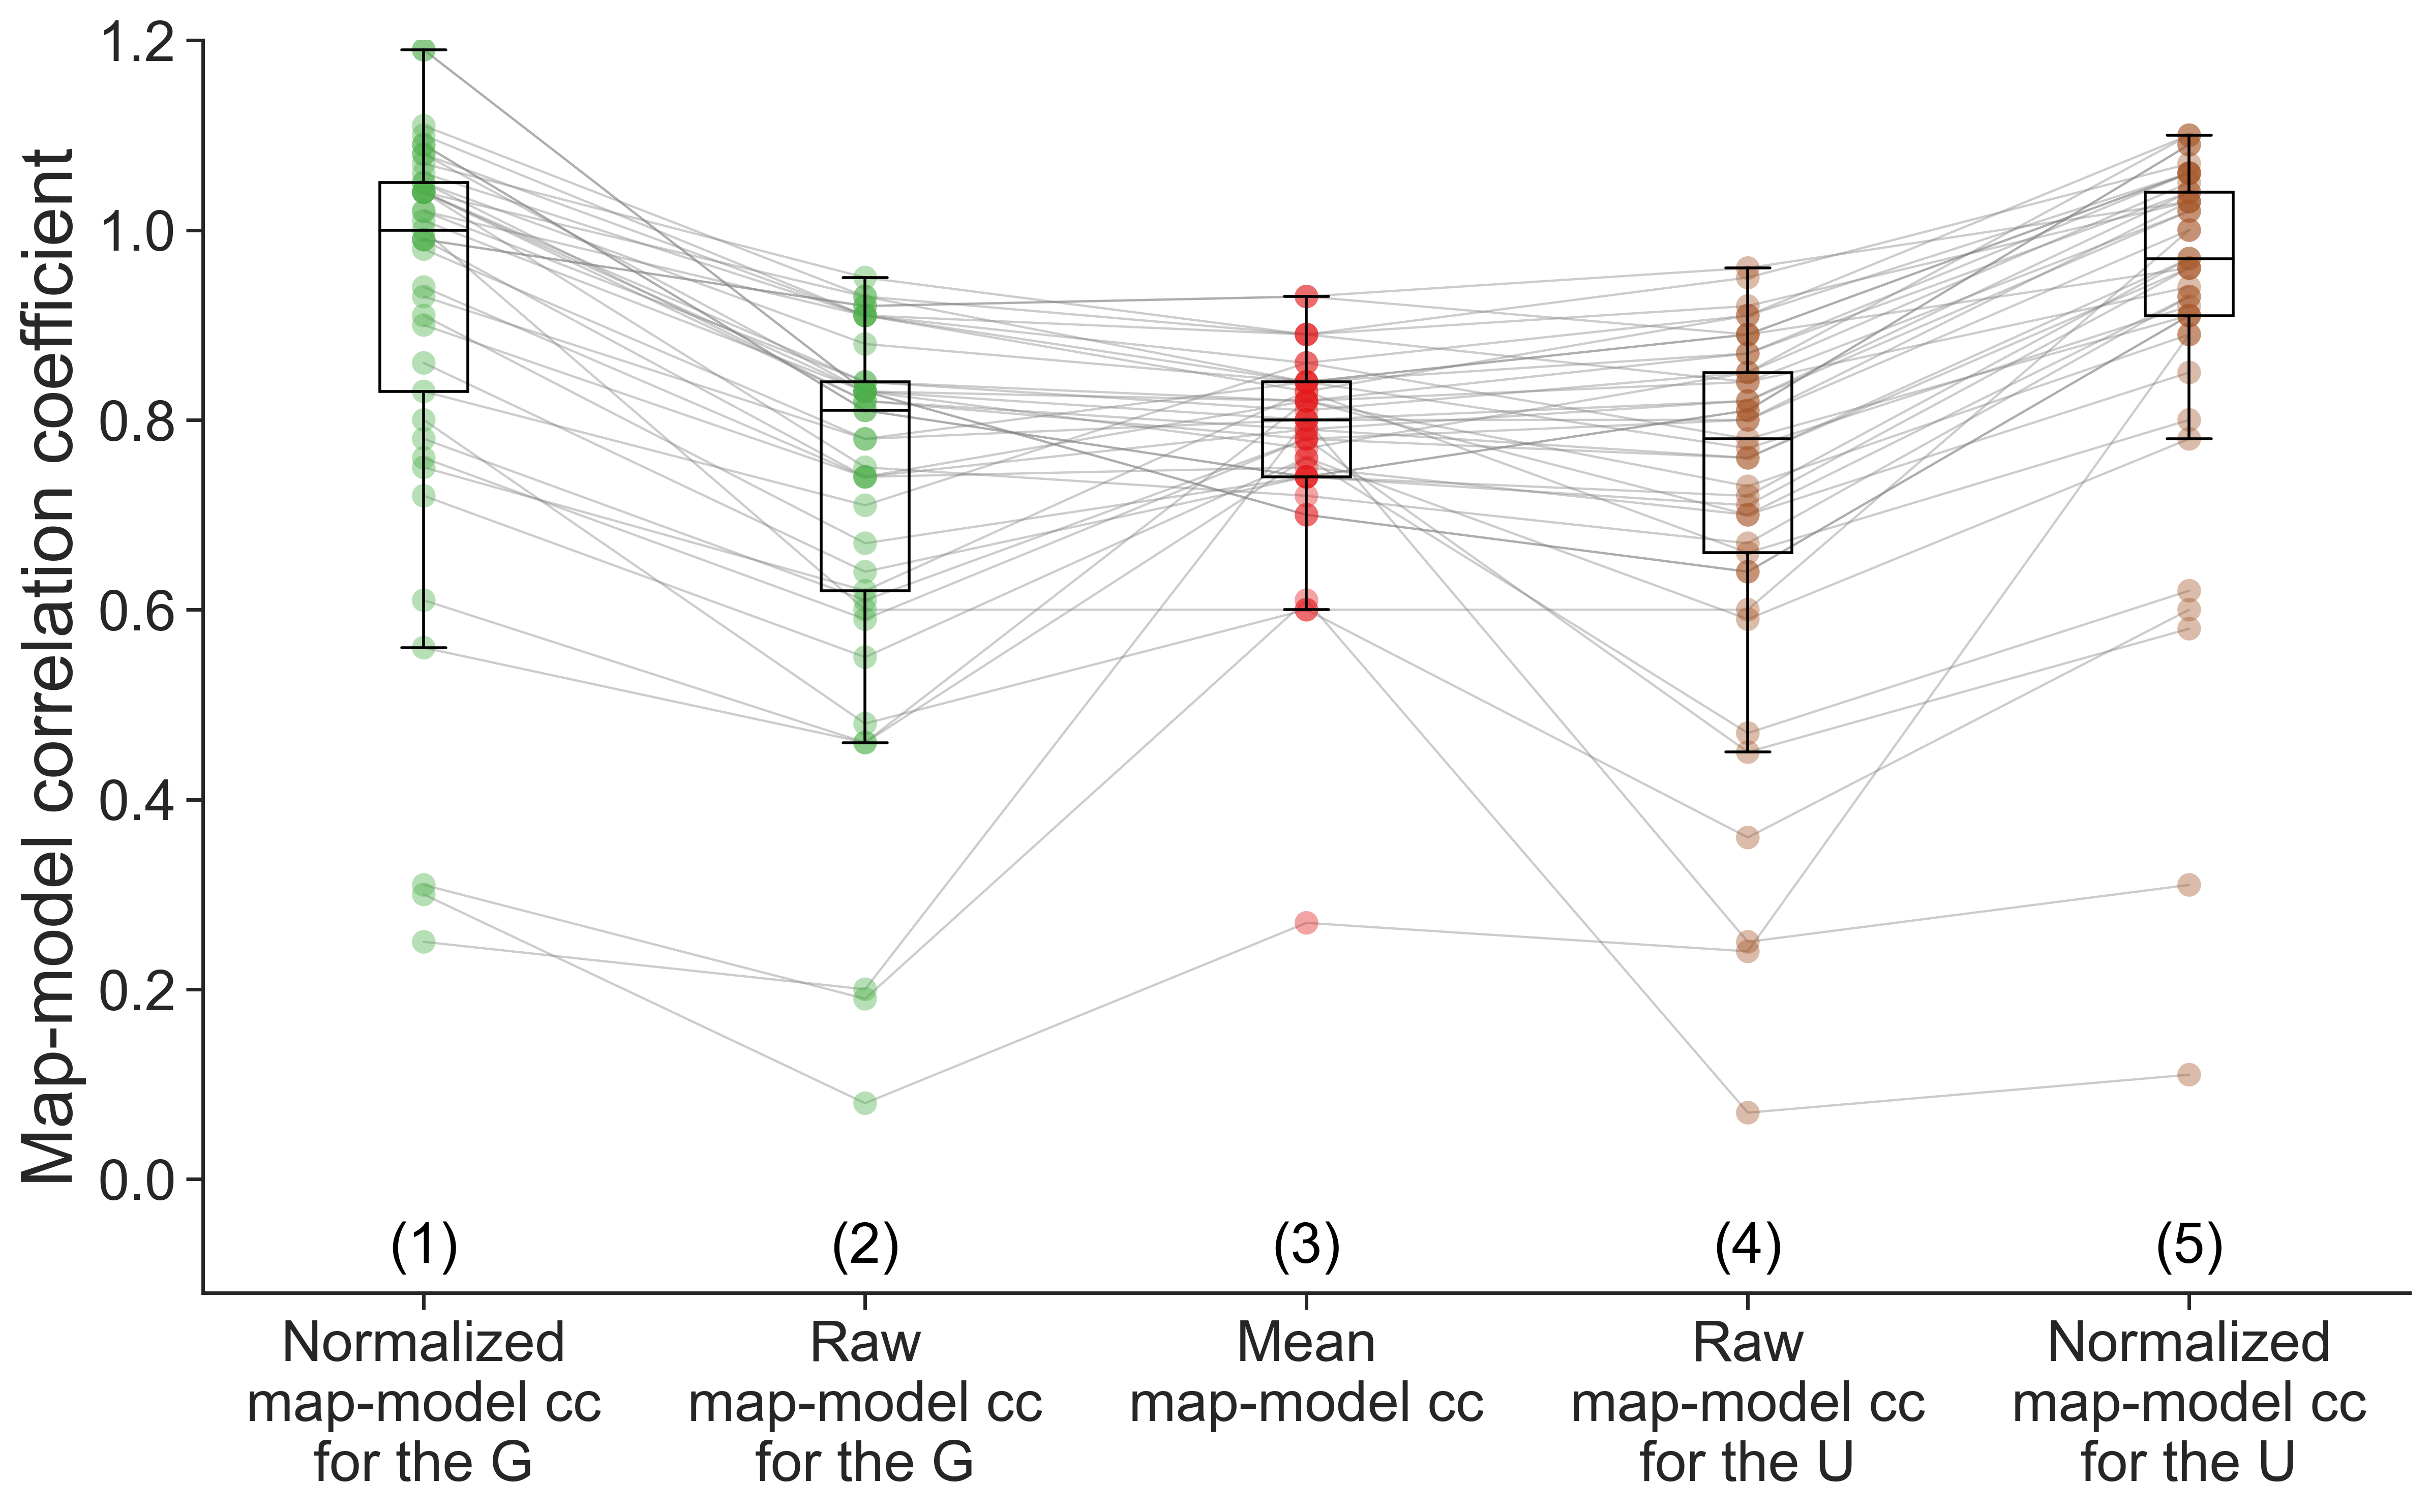

In [34]:
sns.set(style= 'ticks', font= "Arial")
fig, ax = plt.subplots(figsize = (14,8), dpi = 400)


#fig= sns.stripplot(data= [cc_df_mean['Normalized_map_model_cc_for_the_G'], emt_df[emt_cls[0]], emt_df[emt_cls[1]], cc_df_mean['Raw_map_model_cc_for_the_G'], emt_df[emt_cls[2]], emt_df[emt_cls[3]], cc_df_mean['Mean_map_model_cc'], emt_df[emt_cls[4]], emt_df[emt_cls[5]],
#                          cc_df_mean['Raw_map_model_cc_for_the_U'], emt_df[emt_cls[6]], emt_df[emt_cls[7]], cc_df_mean['Normalized_map_model_cc_for_the_U']], 
#                          size= 15, jitter=0, alpha=0.5,  zorder=1, dodge= False,
#                          palette=['#4daf4a', 'W', 'W', '#4daf4a','W', 'W','#e41a1c', 'W','W',
#                                   '#a65628','W', 'W','#a65628'])

# X positions for the columns
x_positions = np.arange(len(cc_df_mean.columns))

colors= ['#4daf4a', '#4daf4a', '#e41a1c', '#a65628','#a65628']


# Set up the plot
#plt.figure(figsize=(8, 6))

# Plot scatter points and connect rows with lines
for i in range(len(cc_df_mean)):
    y_values = cc_df_mean.iloc[i]
    ax.plot(x_positions, y_values, marker='', color='gray', alpha=0.4, linestyle='-', linewidth=0.8, zorder= 1)
    
# Plot scatter points with distinct colors for each column
for x, col in enumerate(cc_df_mean.columns):
    ax.scatter(
        [x] * len(cc_df_mean), 
        cc_df_mean[col], 
        color=colors[x],
        edgecolor='none',
        s= 70,
        alpha=0.4, 
        zorder= 1,
        label=col if x == 0 else None  # Add label for legend only once
    )

# Overlay box plot for each column
PROPS = {
    'boxprops':{'facecolor':'None', 'edgecolor':'black', 'zorder':3},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(data=cc_df_mean, ax=ax, **PROPS, width=0.2, linewidth= 1,  showfliers=False)

l_counts=0
# Annotate above each x-axis tick
for i, label in enumerate(cc_df_mean.columns):
    # The annotation will be placed just above each x-axis tick
    l_counts +=1
    
    #ax.text(x_positions[i], max(cc_df_mean[label]) + 0.1, str(l_counts), ha='center', va='bottom', fontsize=11, color='black')
    ax.text(x_positions[i], -0.1, '('+ str(l_counts)+ ')', ha='center', va='bottom', fontsize=20, color='black')

    
# Customize the plot
x_labels= ['Normalized\nmap-model cc\nfor the G', 'Raw\nmap-model cc\nfor the G', 'Mean\nmap-model cc', 'Raw\nmap-model cc\nfor the U', 'Normalized\nmap-model cc\nfor the U']
plt.yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize = 30)
plt.ylim(-0.12, 1.2)
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, fontsize = 20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylabel("Map-model correlation coefficient", fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


# save the plot as pdf file
plt.savefig('fig_S2A_map_model_cc_mean_normalized.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

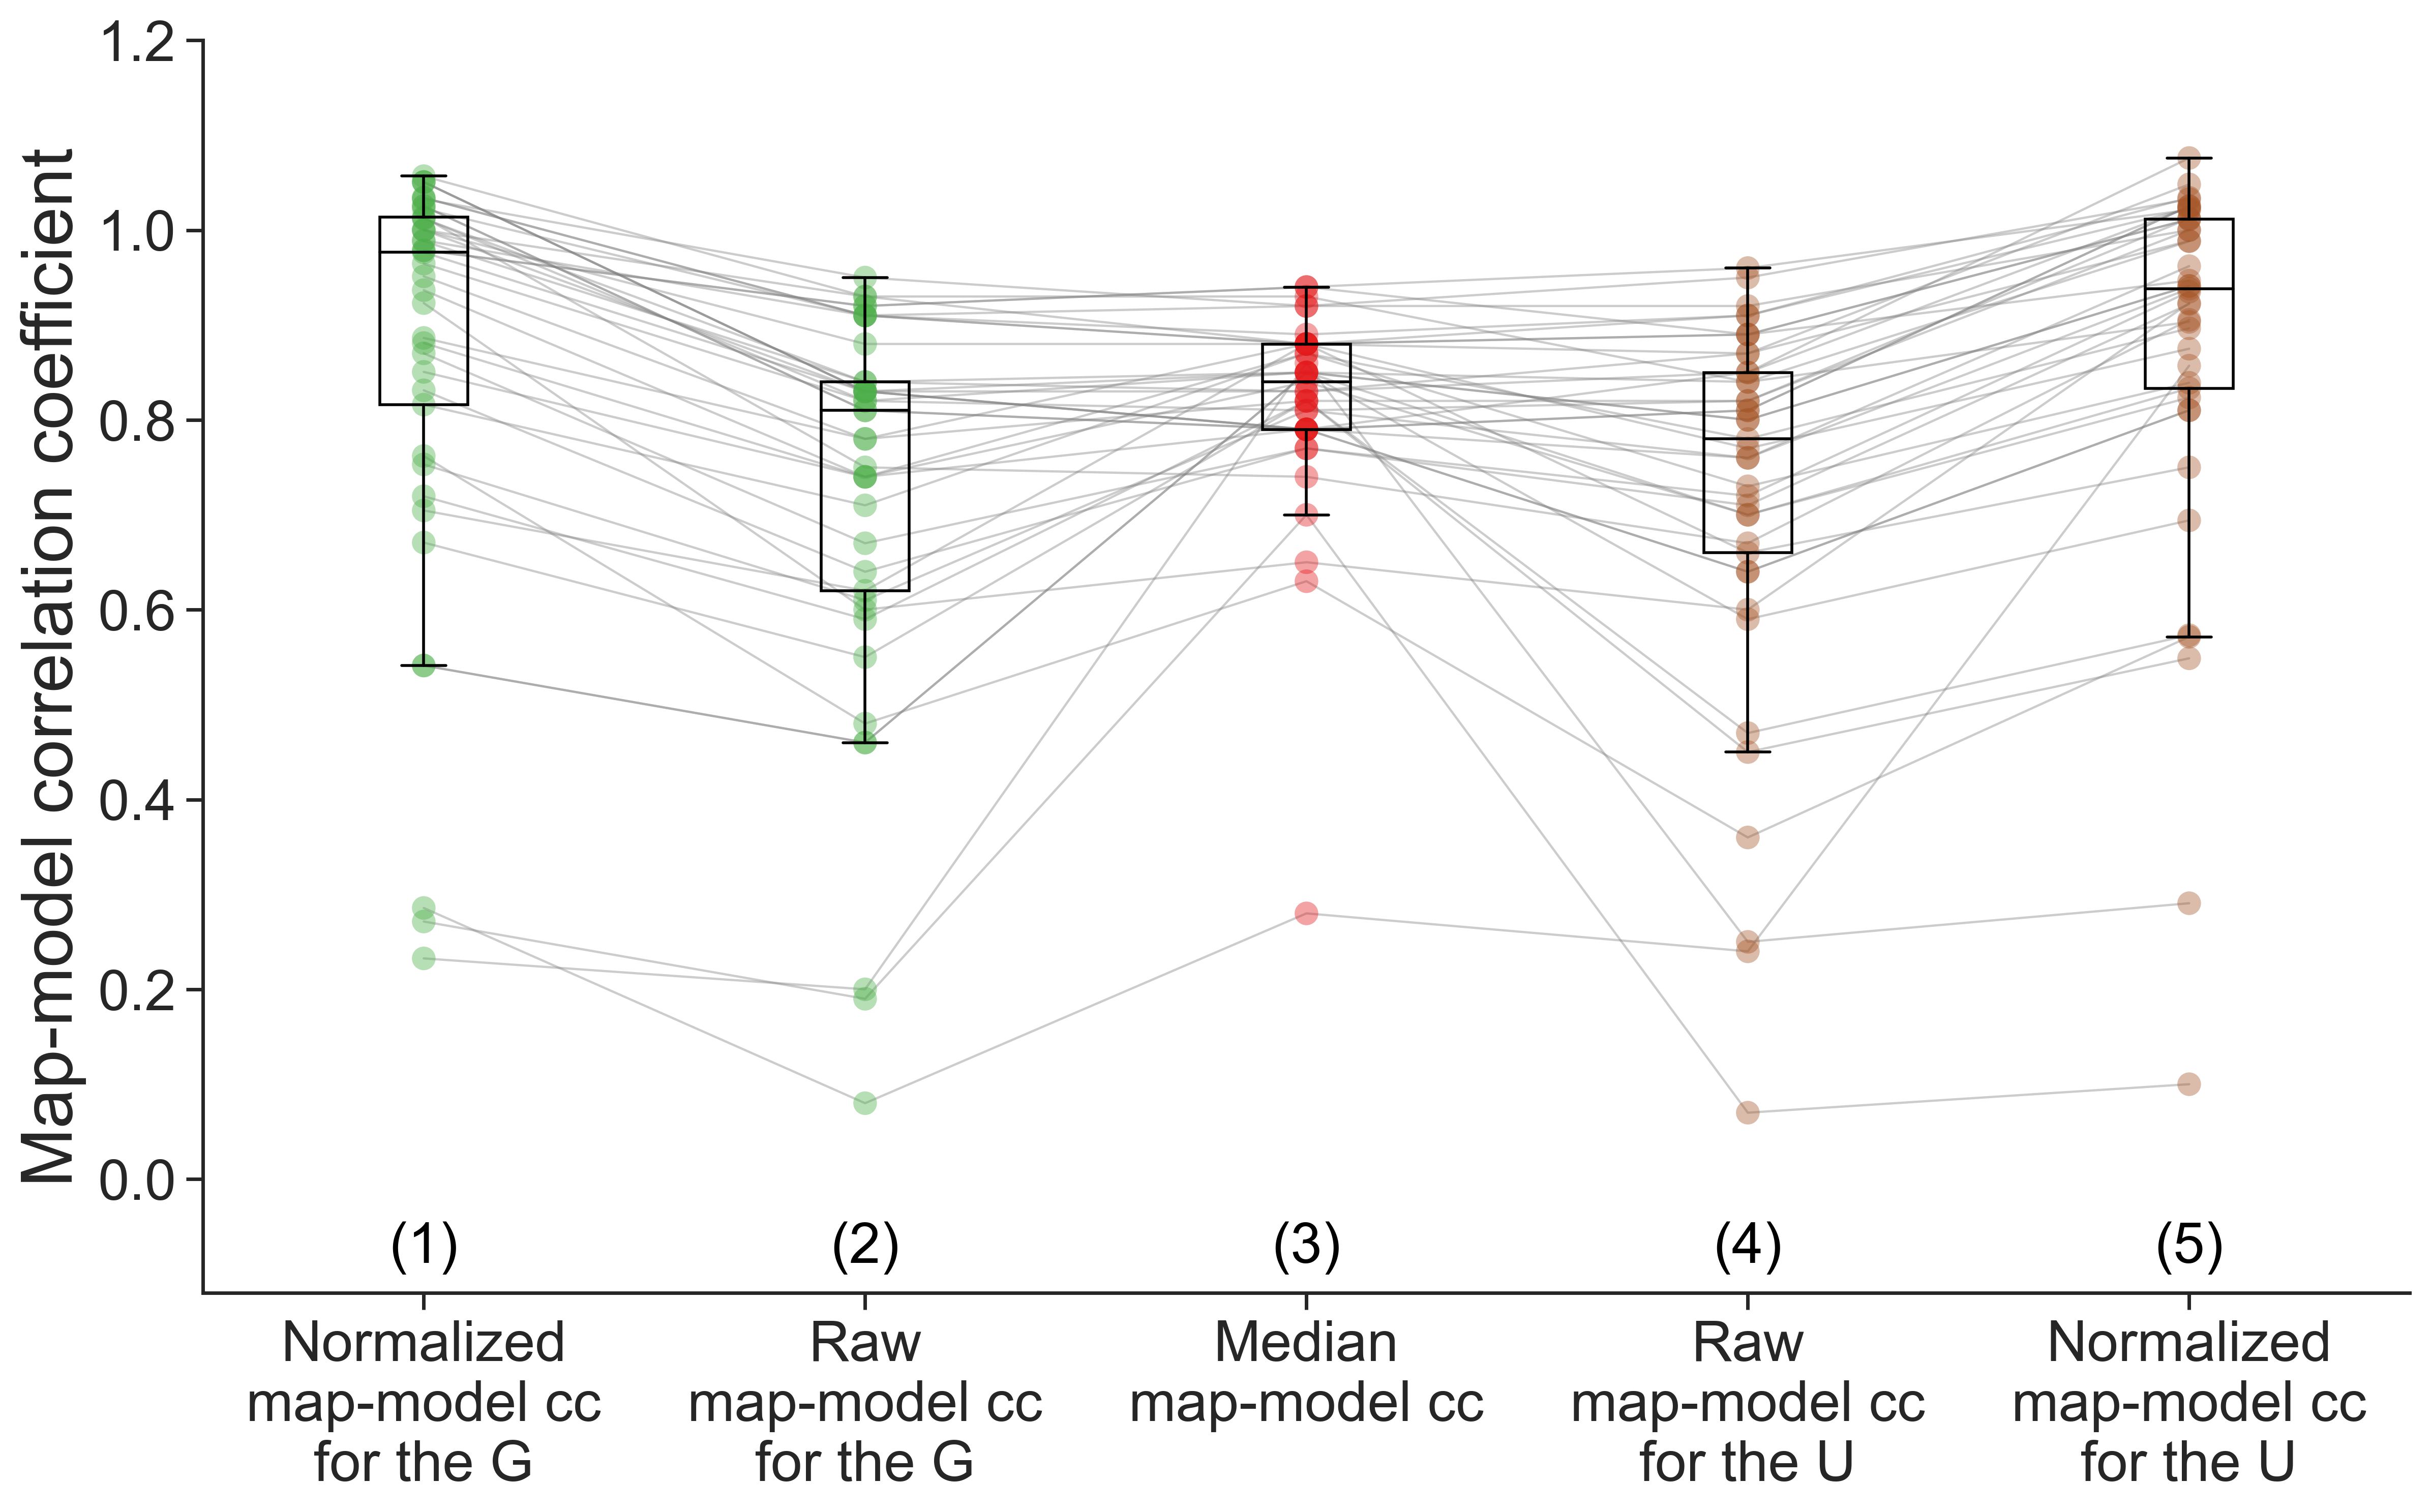

In [35]:
sns.set(style= 'ticks', font= "Arial")
fig, ax = plt.subplots(figsize = (14,8), dpi = 400)


#fig= sns.stripplot(data= [cc_df_mean['Normalized_map_model_cc_for_the_G'], emt_df[emt_cls[0]], emt_df[emt_cls[1]], cc_df_mean['Raw_map_model_cc_for_the_G'], emt_df[emt_cls[2]], emt_df[emt_cls[3]], cc_df_mean['Mean_map_model_cc'], emt_df[emt_cls[4]], emt_df[emt_cls[5]],
#                          cc_df_mean['Raw_map_model_cc_for_the_U'], emt_df[emt_cls[6]], emt_df[emt_cls[7]], cc_df_mean['Normalized_map_model_cc_for_the_U']], 
#                          size= 15, jitter=0, alpha=0.5,  zorder=1, dodge= False,
#                          palette=['#4daf4a', 'W', 'W', '#4daf4a','W', 'W','#e41a1c', 'W','W',
#                                   '#a65628','W', 'W','#a65628'])

# X positions for the columns
x_positions = np.arange(len(cc_df_median.columns))

colors= ['#4daf4a', '#4daf4a', '#e41a1c', '#a65628','#a65628']


# Set up the plot
#plt.figure(figsize=(8, 6))

# Plot scatter points and connect rows with lines
for i in range(len(cc_df_median)):
    y_values = cc_df_median.iloc[i]
    ax.plot(x_positions, y_values, marker='', color='gray', alpha=0.4, linestyle='-', linewidth=0.8, zorder= 1)
    
# Plot scatter points with distinct colors for each column
for x, col in enumerate(cc_df_median.columns):
    ax.scatter(
        [x] * len(cc_df_median), 
        cc_df_median[col], 
        color=colors[x],
        edgecolor='none',
        s= 70,
        alpha=0.4, 
        zorder= 1,
        label=col if x == 0 else None  # Add label for legend only once
    )

# Overlay box plot for each column
PROPS = {
    'boxprops':{'facecolor':'None', 'edgecolor':'black', 'zorder':3},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(data=cc_df_median, ax=ax, **PROPS, width=0.2, linewidth= 1,  showfliers=False)

l_counts=0
# Annotate above each x-axis tick
for i, label in enumerate(cc_df_median.columns):
    # The annotation will be placed just above each x-axis tick
    l_counts +=1
    
    #ax.text(x_positions[i], max(cc_df_mean[label]) + 0.1, str(l_counts), ha='center', va='bottom', fontsize=11, color='black')
    ax.text(x_positions[i], -0.1, '('+ str(l_counts)+ ')', ha='center', va='bottom', fontsize=20, color='black')

    
# Customize the plot
x_labels= ['Normalized\nmap-model cc\nfor the G', 'Raw\nmap-model cc\nfor the G', 'Median\nmap-model cc', 'Raw\nmap-model cc\nfor the U', 'Normalized\nmap-model cc\nfor the U']
plt.yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize = 30)
plt.ylim(-0.12, 1.2)
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, fontsize = 20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylabel("Map-model correlation coefficient", fontsize = 25)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


# save the plot as pdf file
plt.savefig('fig_S2B_map_model_cc_median_normalized.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

In [21]:
sw_df1.columns

Index(['PDB_ID', 'Experimental_Method', 'Resolution (Å)', 'chain_ID', 'seg_ID',
       'Source_Organism_chain', 'Molecule', 'Source_Organism_all',
       'Expressed_Organism', 'Chain_length_reference',
       'Chain_length_structure', 'res_index_res1', 'bp_notation',
       'res_ID_res1', 'res_index_res2', 'res_ID_res2', 'bp_res', 'bp_ID',
       'b_resG', 'b_resU', 'b_comb', 'O6_O4_dih', 'N1_O2_dis', 'N1_N3_dis',
       'N1_O4_dis', 'N2_O2_dis', 'N2_N3_dis', 'N2_O4_dis', 'O6_O2_dis',
       'O6_N3_dis', 'O6_O4_dis', 'N1_O4_dih', 'N2_N3_dih', 'flank1', 'flank2',
       'adj_res1', 'adj_res2', 'red_group_ID', 'number_of_group_members',
       'missing_res_atoms', 'RMSD_to_avg', 'representative', 'G_N1_detail',
       'G_N2_detail', 'G_N3_detail', 'G_O6_detail', 'G_N7_detail',
       'G_O2'_detail', 'G_O4'_detail', 'U_O2_detail', 'U_N3_detail',
       'U_O4_detail', 'U_O2'_detail', 'U_O4'_detail', 'G_N1_type', 'G_N2_type',
       'G_N3_type', 'G_O6_type', 'G_N7_type', 'G_O2'_type', 'G_O4

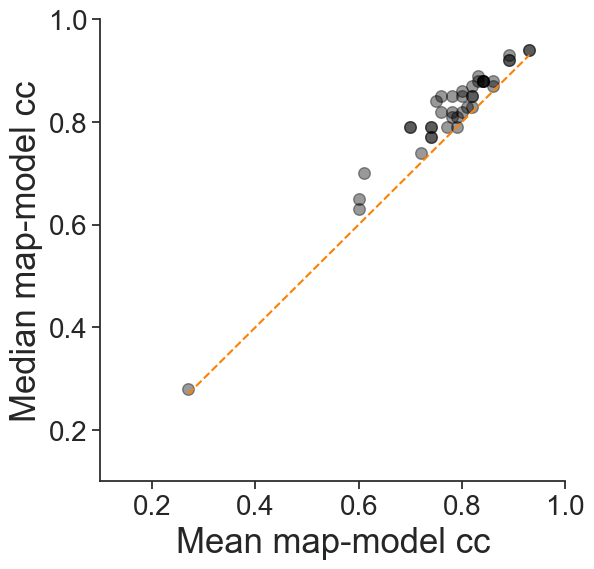

In [37]:
# Scatter Plot
plt.figure(figsize=(6, 6))  # Set the figure size
plt.scatter(sw_df1['Mean_map_model_cc'], sw_df1['Median_map_model_cc'], s= 70, color='black', alpha= 0.4)#, label='Data Points')

# Add Dotted Line x == y
x = np.linspace(min(sw_df1['Mean_map_model_cc']), max(sw_df1['Mean_map_model_cc']), 100)  # Generate x values for the line
plt.plot(x, x, linestyle='--', color='#ff7f00') #label='x = y'  # Dashed red line where x == y

plt.xlim(0.1, 1.0)
plt.ylim(0.1, 1.0)
plt.yticks(ticks=[0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 20)
plt.xticks(ticks=[0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 20)
# Add Labels and Title
plt.xlabel('Mean map-model cc', fontsize=25)
plt.ylabel('Median map-model cc', fontsize=25)

#plt.title('Scatter Plot of Column_X vs Column_Y with x = y Line', fontsize=14)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

# save the plot as pdf file
plt.savefig('fig_S2C_median_vs_mean_map_model_cc.pdf', format="pdf", bbox_inches="tight", dpi = 3000)